In [1]:
# https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import sys

#REPO_DIR = '../../'
REPO_DIR = '/home/jacob/github/com/striebel/domain_adaptation_experiment'


visualize_dir = os.path.join(REPO_DIR, 'visualize')
assert os.path.isdir(visualize_dir)

results = dict()

ewt_domains = [
    'answer', 'email', 'newsgroup', 'reviews', 'weblog'
]
gum_domains = [
    'GUM_conversation', 'GUM_fiction', 'GUM_interview', 'GUM_vlog', 'GUM_whow'
]
domains = ['all'] + ewt_domains + gum_domains
assert 11 == len(domains)

proportion_strs = [
    '000', '005', '010', '015', '020', '025', '030', '035', '040', '045',
    '050', '055', '060', '065', '070', '075', '080', '085', '090', '095', '100'
]
assert 21 == len(proportion_strs)

for domain in domains:
    
    results[domain] = dict()

    domain_dir = os.path.join(visualize_dir, domain)
    assert os.path.isdir(domain_dir)
    
    for proportion in proportion_strs:

        proportion_dir = os.path.join(domain_dir, proportion)
        assert os.path.isdir(proportion_dir)
        in_dir = proportion_dir
        
        in_name = 'test_v4.json'
        in_path = os.path.join(in_dir, in_name)
        assert os.path.isfile(in_path)
        
        in_file = open(in_path, 'r')
        in_dict = json.loads(in_file.read())
        in_file.close()
        
        results[domain][proportion] = in_dict





In [2]:
n_beat_baseline = dict()
ds_beat_baseline = dict()
for ps in proportion_strs:
    assert ps not in n_beat_baseline
    assert ps not in ds_beat_baseline
    n_beat_baseline[ps] = 0
    ds_beat_baseline[ps] = list()
    for ds in domains:
        if results[ds]['010']['0004_las'] < results[ds][ps]['0004_las']:
            n_beat_baseline[ps] += 1
            ds_beat_baseline[ps].append(ds)


import pprint
pprint.pprint(n_beat_baseline)
pprint.pprint(ds_beat_baseline)



{'000': 0,
 '005': 1,
 '010': 0,
 '015': 4,
 '020': 4,
 '025': 0,
 '030': 0,
 '035': 0,
 '040': 0,
 '045': 0,
 '050': 0,
 '055': 0,
 '060': 0,
 '065': 0,
 '070': 0,
 '075': 0,
 '080': 0,
 '085': 0,
 '090': 0,
 '095': 0,
 '100': 0}
{'000': [],
 '005': ['weblog'],
 '010': [],
 '015': ['newsgroup', 'weblog', 'GUM_conversation', 'GUM_whow'],
 '020': ['newsgroup', 'weblog', 'GUM_conversation', 'GUM_whow'],
 '025': [],
 '030': [],
 '035': [],
 '040': [],
 '045': [],
 '050': [],
 '055': [],
 '060': [],
 '065': [],
 '070': [],
 '075': [],
 '080': [],
 '085': [],
 '090': [],
 '095': [],
 '100': []}


uas_min: 0.7978969262768661
uas_max: 0.9341677096370463
las_min: 0.7497111162468223
las_max: 0.9122063919907586


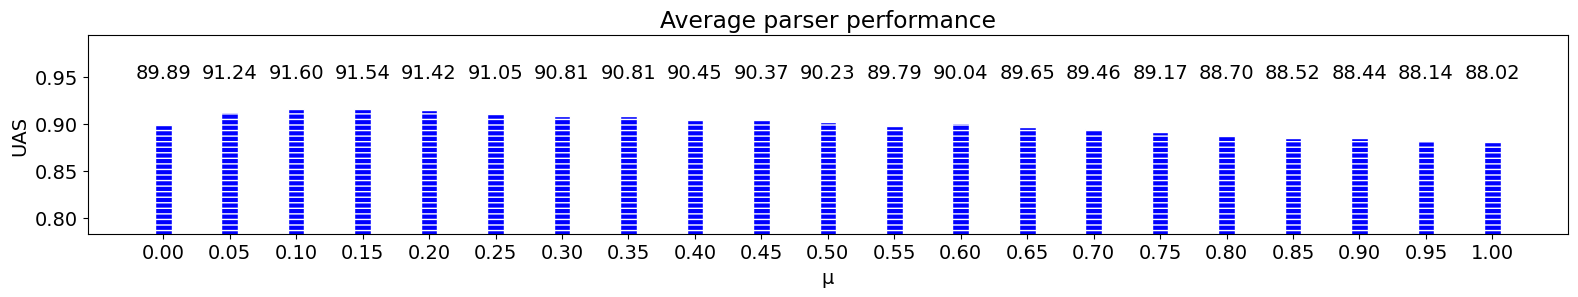

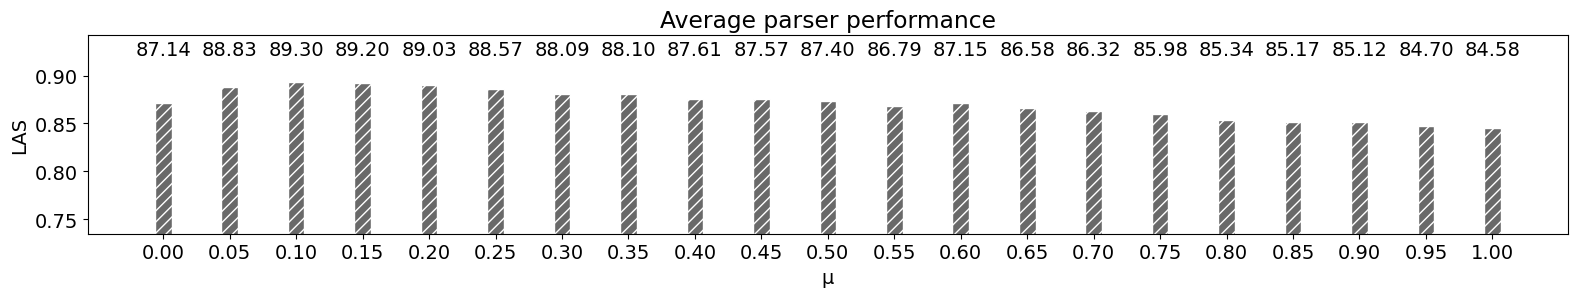

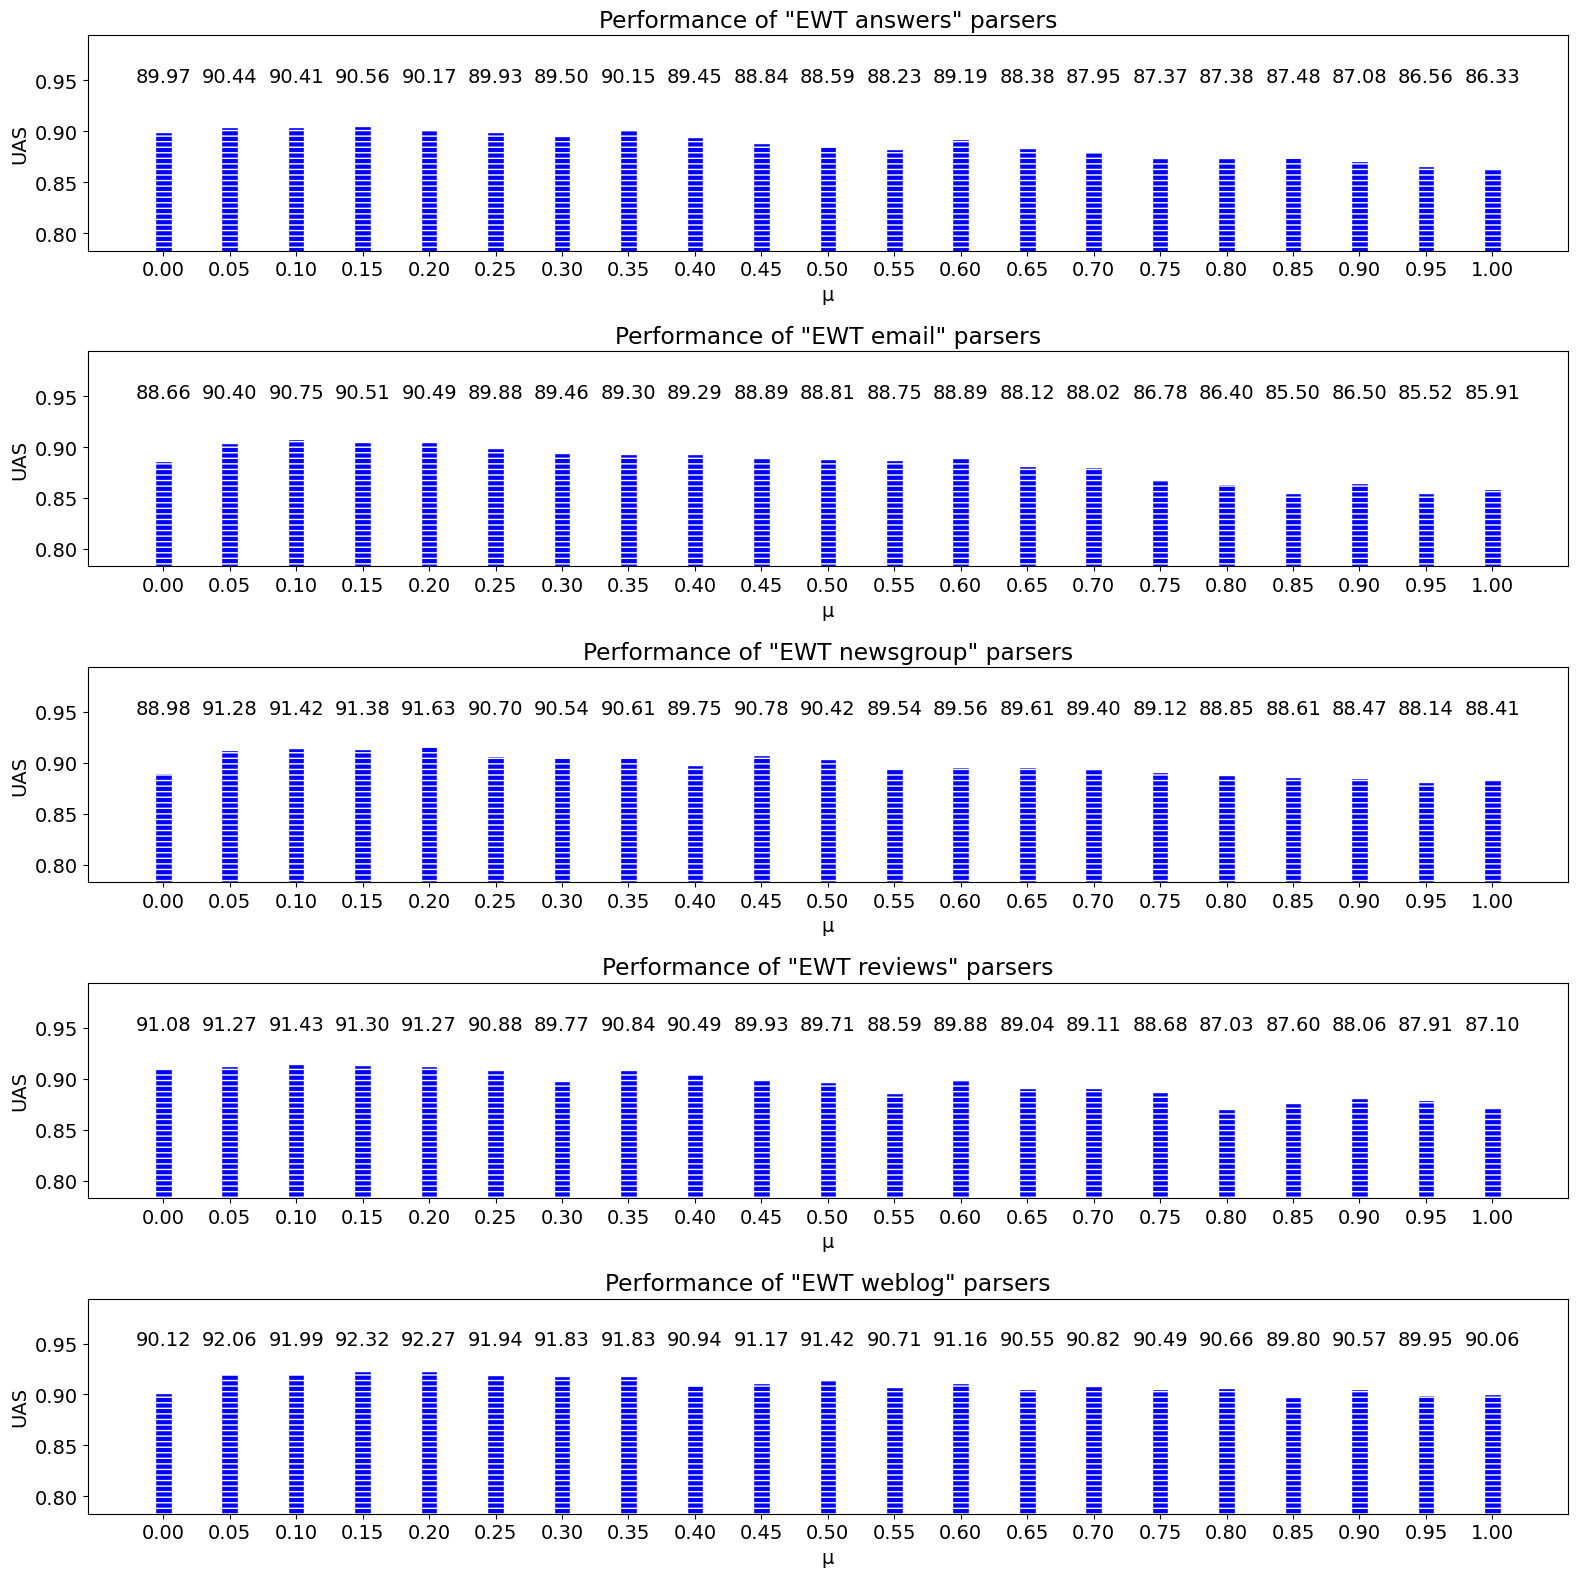

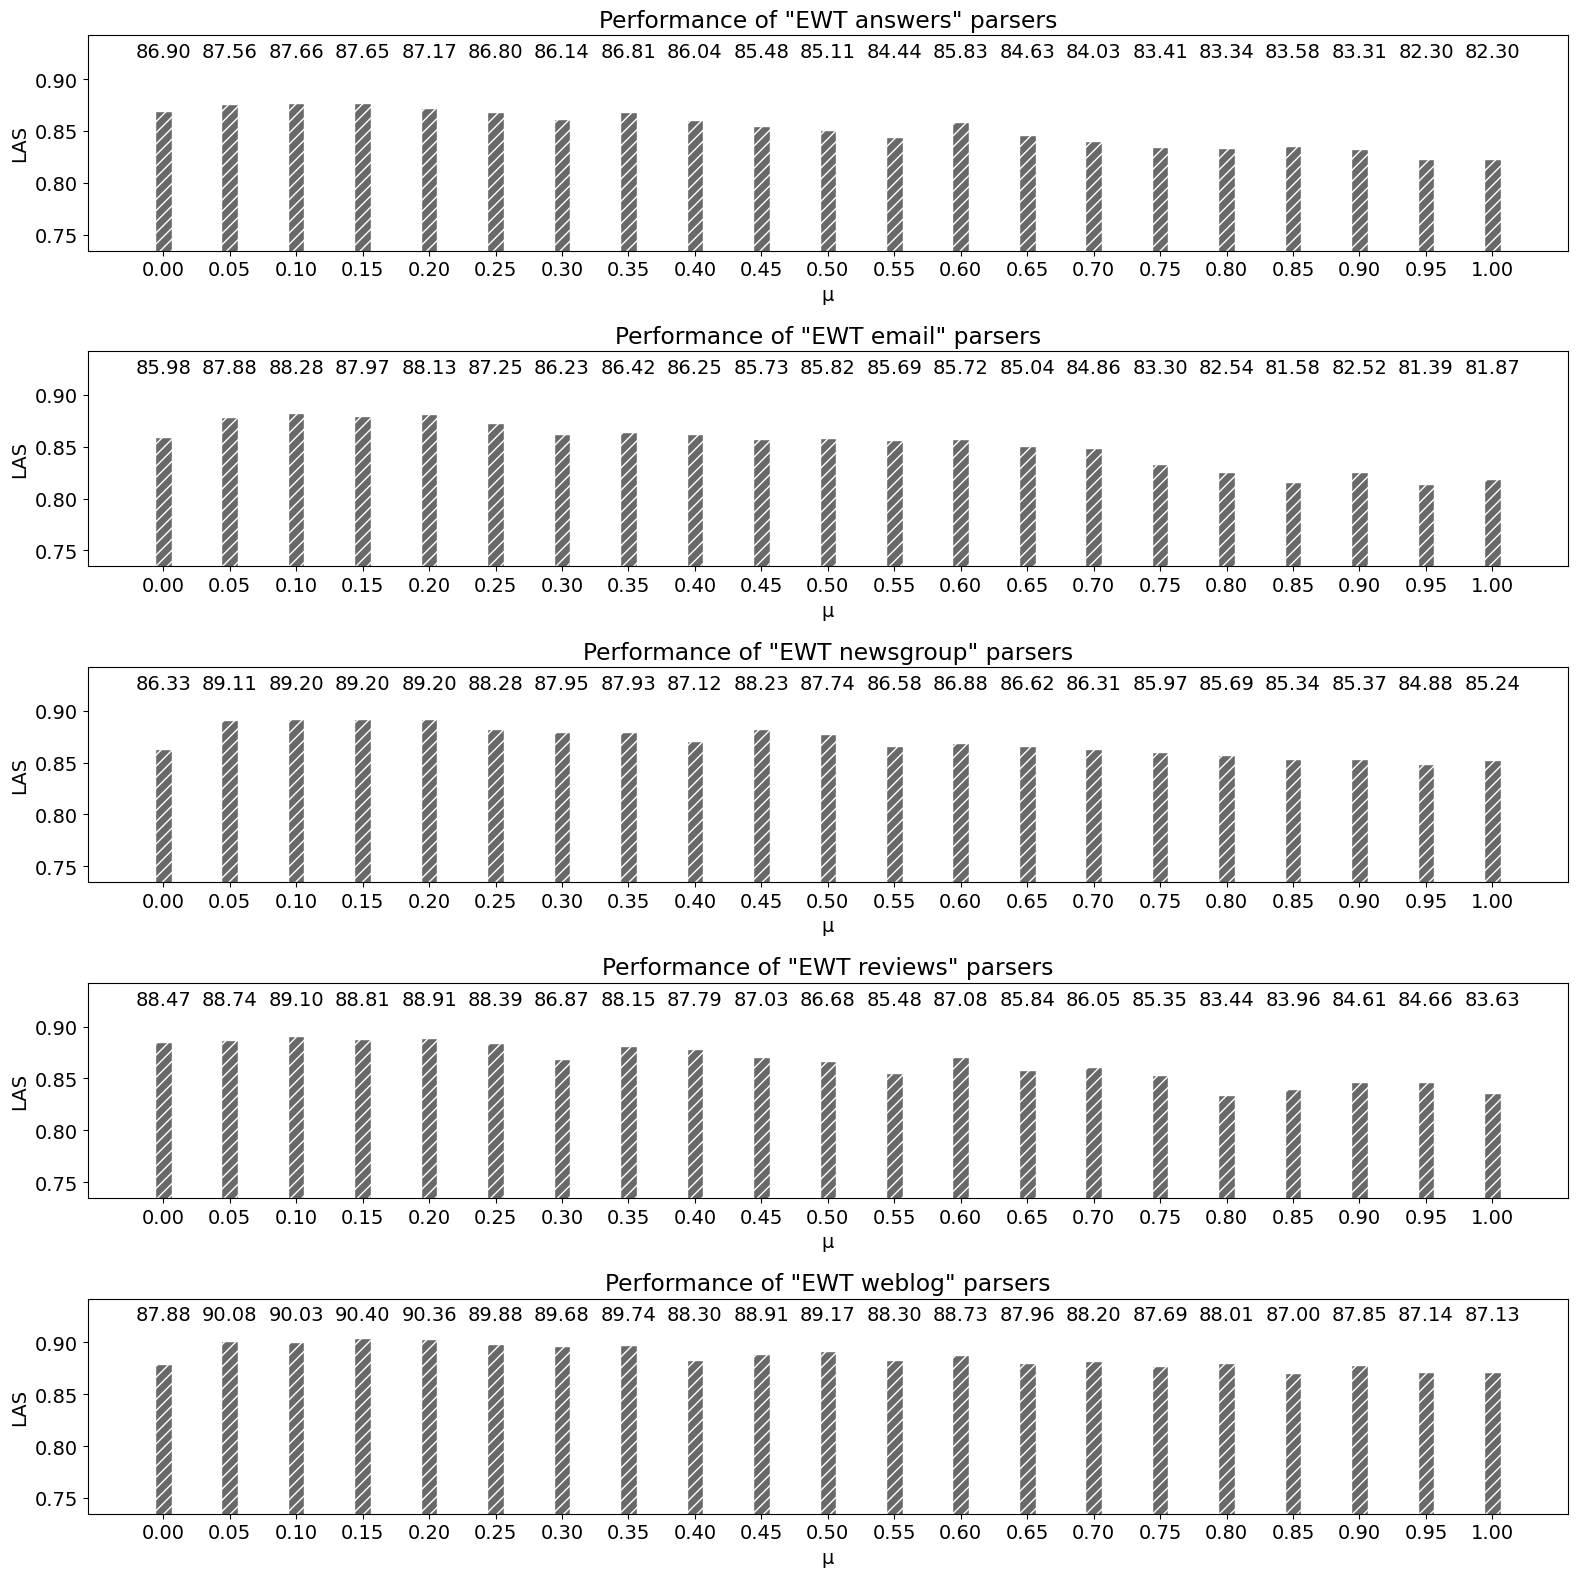

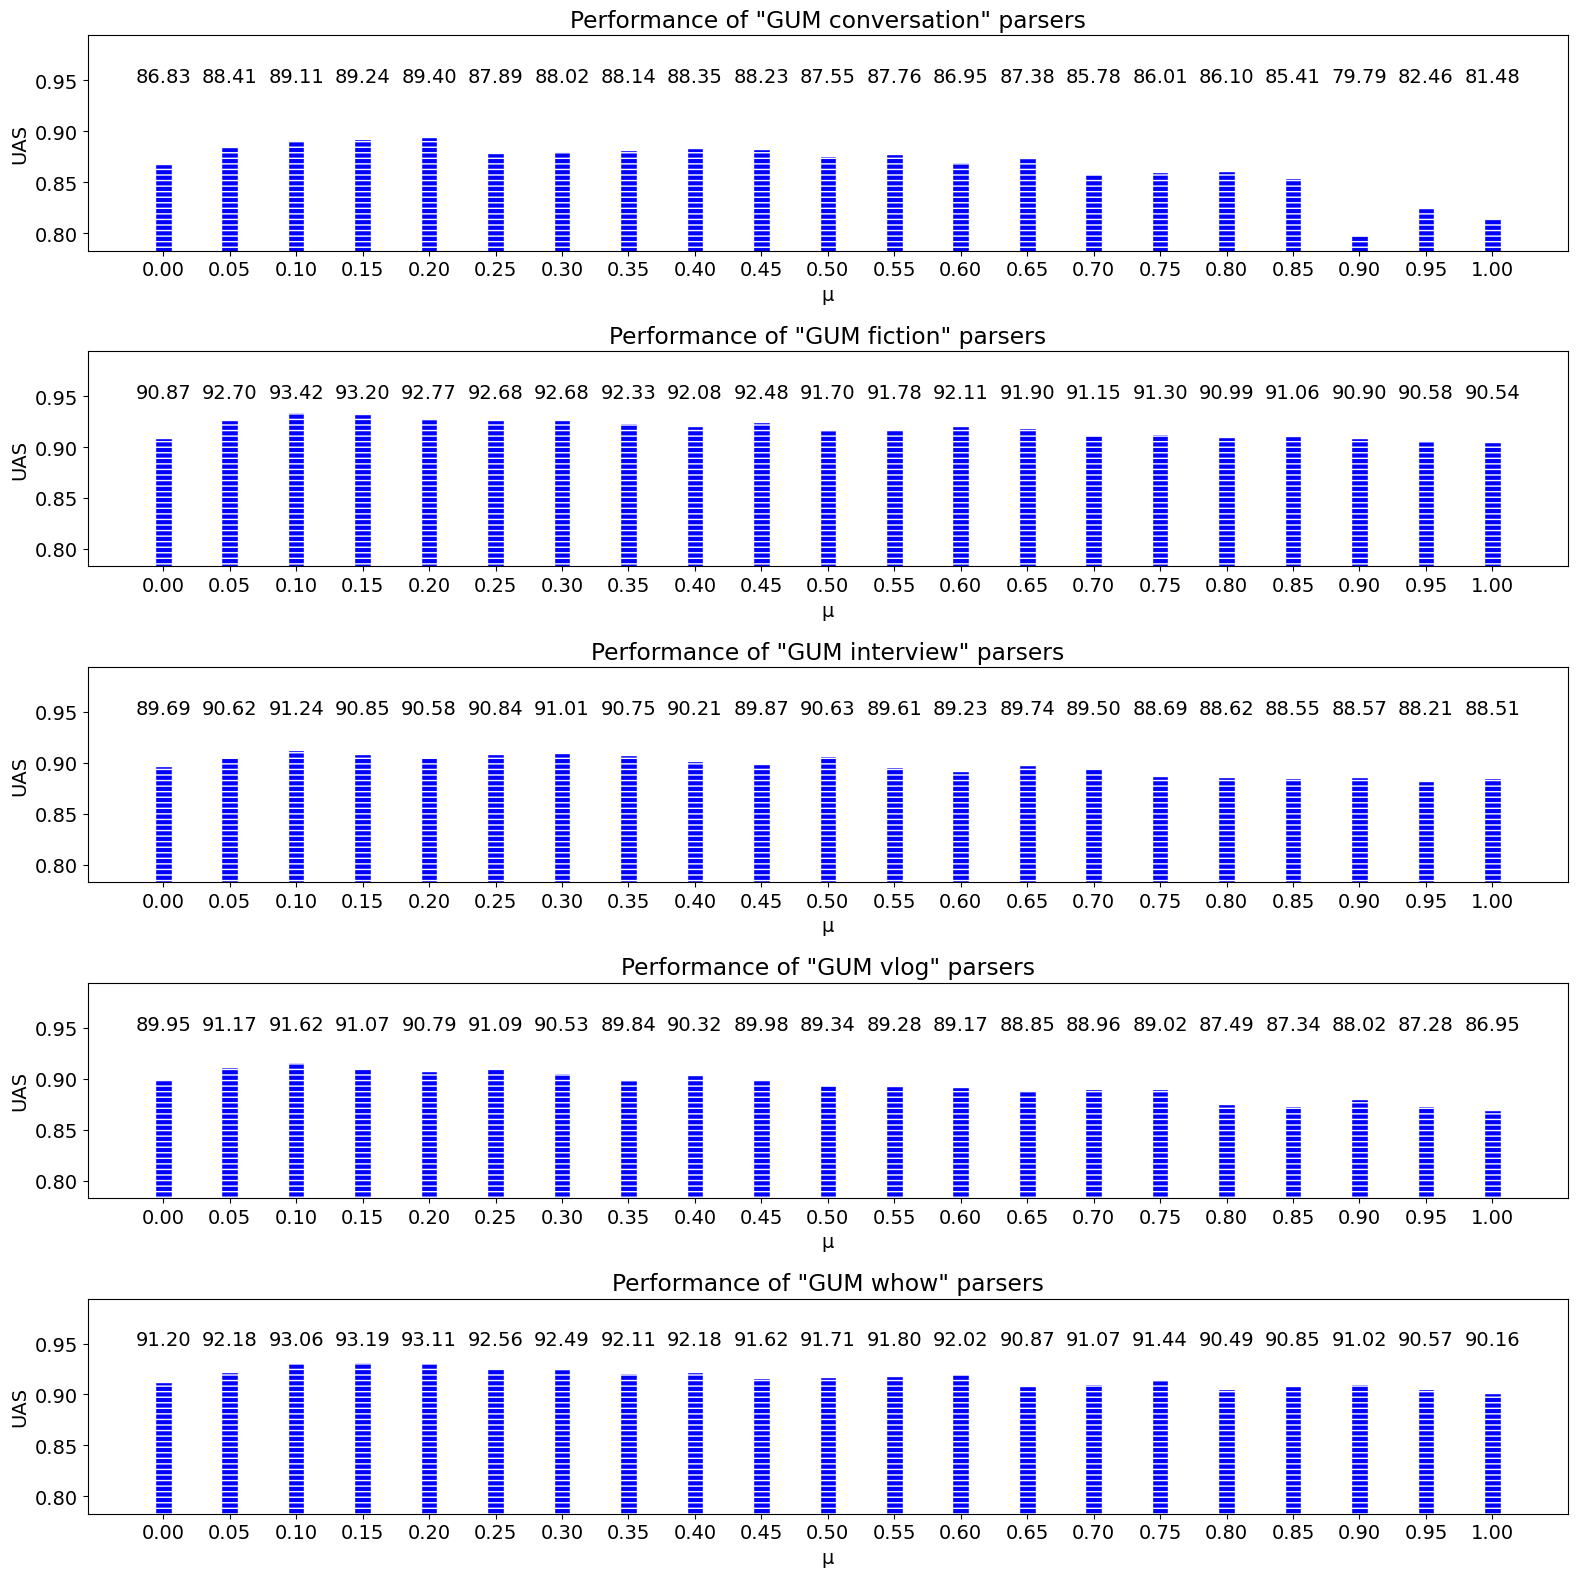

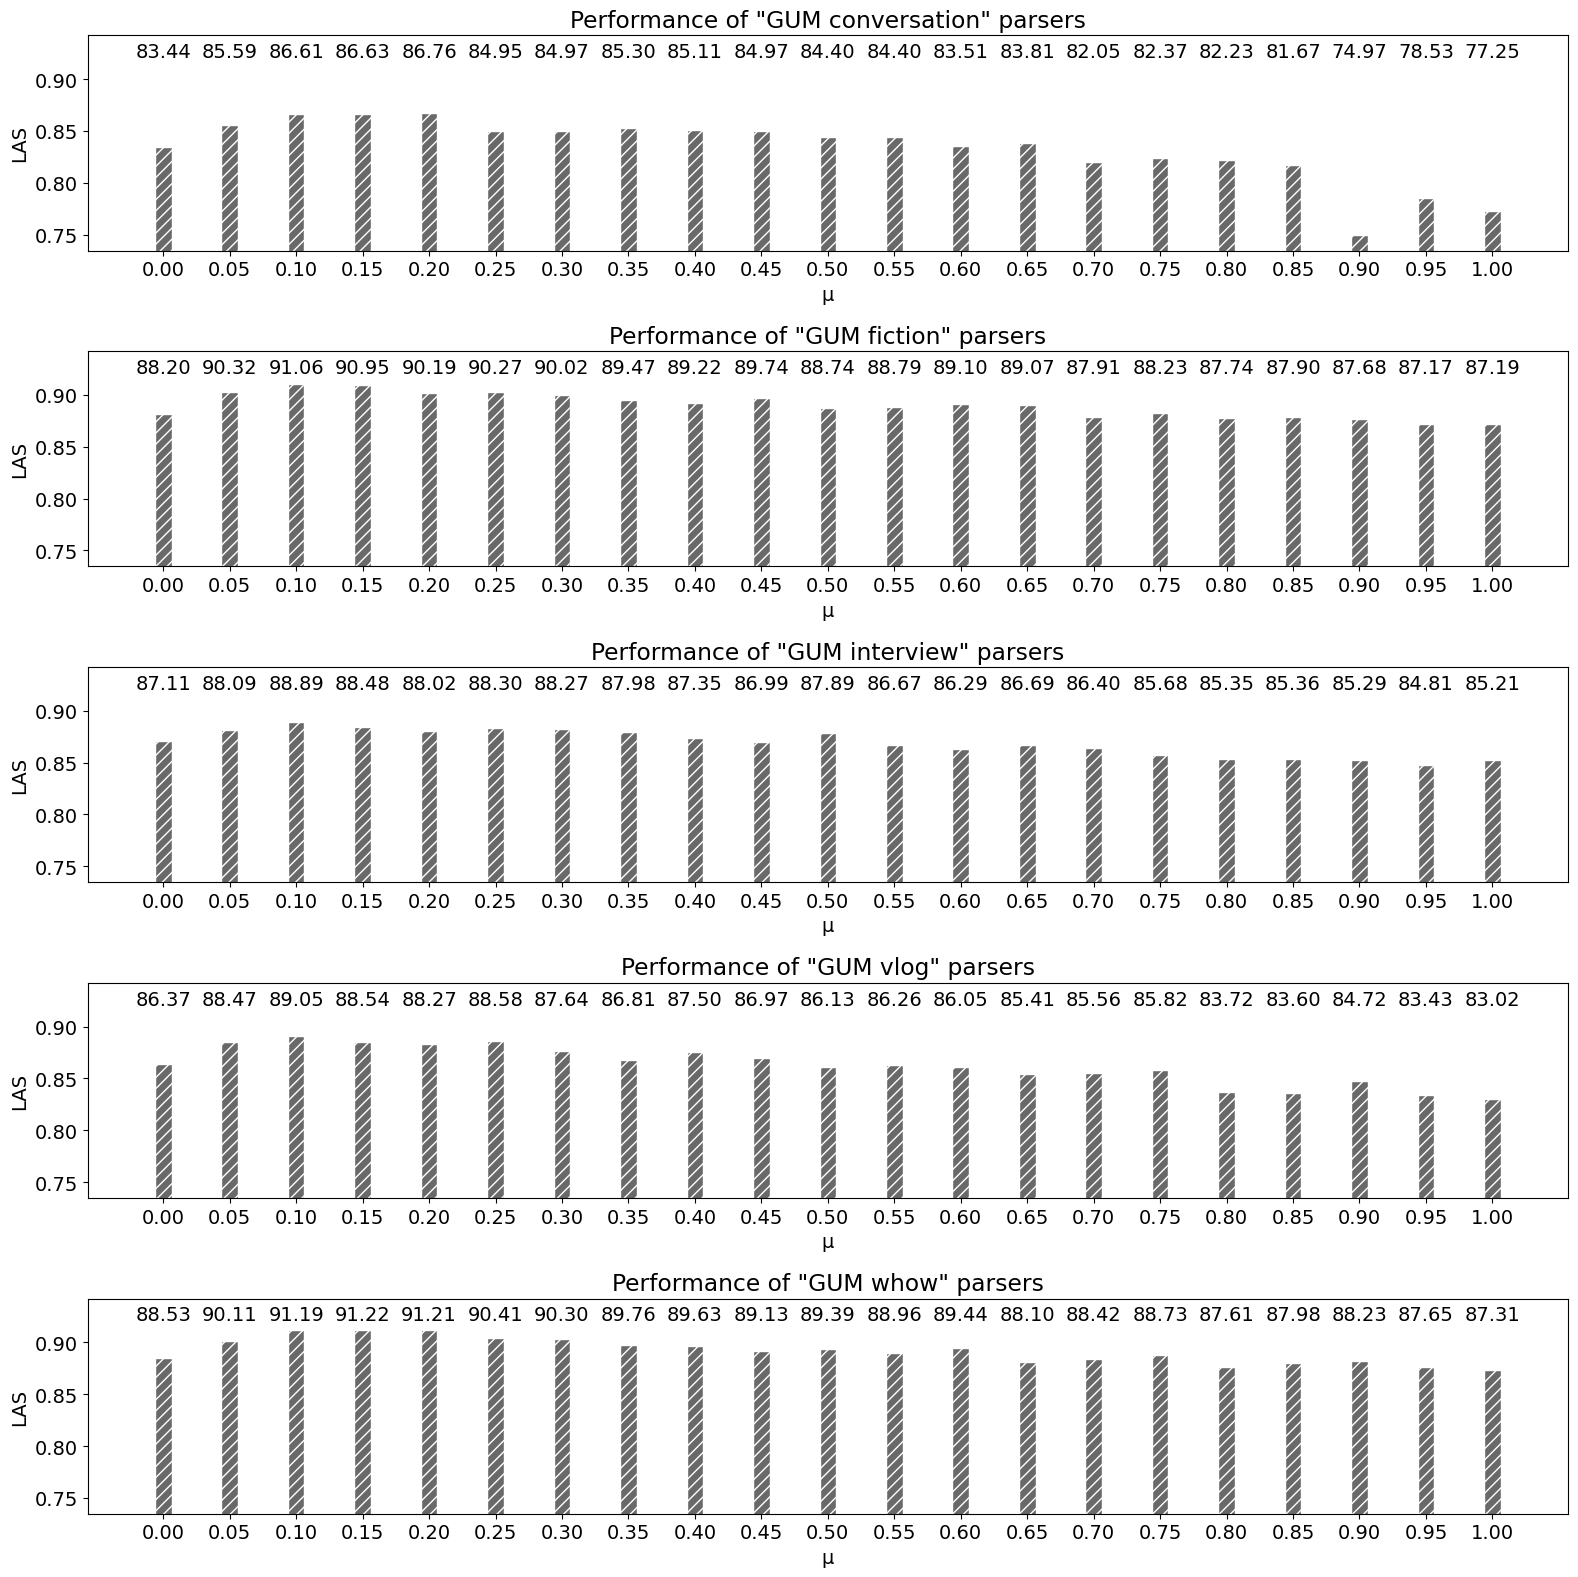

In [3]:


font = {'size' : 14}

matplotlib.rc('font', **font)




uas_min = 100.0
uas_max =   0.0
las_min = 100.0
las_max =   0.0
for domain in ['all'] + ewt_domains + gum_domains:
    for ps in proportion_strs:
        uas = results[domain][ps]['0004_uas']
        las = results[domain][ps]['0004_las']
        if uas < uas_min:
            uas_min = uas
        if uas_max < uas:
            uas_max = uas
        if las < las_min:
            las_min = las
        if las_max < las:
            las_max = las

print('uas_min:', uas_min)
print('uas_max:', uas_max)
print('las_min:', las_min)
print('las_max:', las_max)




for domain_group, domains in zip(['all', 'ewt', 'gum'], [['all'], ewt_domains, gum_domains]):

  for metric in ['uas', 'las']:

    if 5 == len(domains):
        figsize=(10, 3)
    else:
        assert 1 == len(domains)
        figsize=(2, 3)
    
    fig, ax = plt.subplots(nrows=len(domains), ncols=1, figsize=figsize)

    if 1 == len(domains):
        ax = [ax]
    
    for chart_index, domain in enumerate(domains):
        
        assert 21 == len(proportion_strs)
        list_of_results = [
            results[domain][ps]
            for ps in proportion_strs
        ]
        
        #labels   = ['Prec@5', 'Prec@10', 'Prec@20', 'NDCG@5', 'NDCG@10', 'NDCG@20']
        for ps in proportion_strs:
            assert 3 == len(ps)
        labels = [ps[0]+'.'+ps[1]+ps[2] for ps in proportion_strs]
        assert 21 == len(labels)

        assert results[domain]['010']['0004_uas'] == results[domain]['010']['0002_uas']
        assert results[domain]['010']['0004_uas'] == results[domain]['085']['0002_uas']
        assert results[domain]['010']['0004_uas'] == results[domain]['000']['0002_uas']

        assert results[domain]['010']['0004_las'] == results[domain]['010']['0002_las']
        assert results[domain]['010']['0004_las'] == results[domain]['065']['0002_las']
        
        
        if 'uas' == metric:
            scores = [
                results[domain][ps]['0004_uas'] for ps in proportion_strs
            ]
        else:
            assert 'las' == metric
            scores = [
                results[domain][ps]['0004_las'] for ps in proportion_strs
            ]          
        
        #rec_bm25 = [0.54,     0.49,      0.43,      0.56,     0.51,      0.46     ]
        #las = [result['scores']['UAS'] for result in list_of_results]
        
        #rec_cs   = [0.57,     0.56,      0.51,      0.56,     0.54,      0.51     ]
        #las = [result['scores']['LAS'] for result in list_of_results]
        
        #rec_kg   = [0.69,     0.71,      0.71,      0.59,     0.63,      0.64     ]
        #x        = np.array([3,6,9,12,15,18,21,24])
        x = np.array(
            [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]
        )
        #x = np.array([1,2,3,4,5,6,7,8])
        
        #width = 0.75  # the width of the bars
        width = 1.25
        #x = np.arange(start=0, stop=len(labels), step=(width*2))  # the label locations
        
        
        
        if 'uas' == metric:
            #rects1 = ax.bar(x - width, rec_bm25, width, label='BM25',    color='orange',   edgecolor='white', hatch='-')
            #rects1 = ax[chart_index].bar(x - (width*.5), uas, width, label='UAS',    color='blue',   edgecolor='white', hatch='---')             
            rects = ax[chart_index].bar(x, scores, width, label='UAS', color='blue', edgecolor='white', hatch='---')
            ax[chart_index].set_ylabel('UAS')
        else:
            assert 'las' == metric
            
            #rects2 = ax.bar(x        , rec_cs,   width, label='Cos Sim', color='green', edgecolor='white', hatch='|')
            #rects2 = ax[chart_index].bar(x + (width*.5)        , las,   width, label='LAS', color='black', edgecolor='white', hatch='///') #hatch='|')
            rects = ax[chart_index].bar(x, scores, width, label='LAS', color='dimgray', edgecolor='white', hatch='///')
            ax[chart_index].set_ylabel('LAS')
        
        #rects3 = ax.bar(x + width, rec_kg,   width, label='KG',      color='blue', edgecolor='white', hatch='+')
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        #ax[chart_index].set_ylabel('')#'Scores')

        ax[chart_index].set_xlabel('μ')
        
        if 'all' == domain_group:
            ax[chart_index].set_title('Average parser performance')
        else:
            assert domain_group in ['ewt', 'gum']

            domain_to_str = None
            if 'answer' == domain:
                domain_to_str = 'EWT answers'
            elif 'email' == domain:
                domain_to_str = 'EWT email'
            elif 'newsgroup' == domain:
                domain_to_str = 'EWT newsgroup'
            elif 'reviews' == domain:
                domain_to_str = 'EWT reviews'
            elif 'weblog' == domain:
                domain_to_str = 'EWT weblog'
            elif 'GUM_conversation' == domain:
                domain_to_str = 'GUM conversation'
            elif 'GUM_fiction' == domain:
                domain_to_str = 'GUM fiction'
            elif 'GUM_interview' == domain:
                domain_to_str = 'GUM interview'
            elif 'GUM_vlog' == domain:
                domain_to_str = 'GUM vlog'
            elif 'GUM_whow' == domain:
                domain_to_str = 'GUM whow'
            else:
                assert False

            assert isinstance(domain_to_str, str)
            
            ax[chart_index].set_title('Performance of "%s" parsers' % domain_to_str)
        
        ax[chart_index].set_xticks(x)
        ax[chart_index].set_xticklabels(labels)
        
        #if 0 == chart_index:
        #ax[chart_index].legend(loc='upper right', bbox_to_anchor=(0.9, 0.7))
        
        if 'uas' == metric:
            #ax.set_ylim(bottom=0.,top=1.)

            TOP = uas_max + 0.06
            BOT = uas_min - 0.015
            ax[chart_index].set_ylim(bottom=BOT, top=TOP)

            bar_label_height = TOP - 0.05
        else:
            assert 'las' == metric

            TOP = las_max + 0.03
            BOT = las_min - 0.015
            ax[chart_index].set_ylim(bottom=BOT, top=TOP)

            bar_label_height = TOP - 0.025
        
        def autolabel(rects, proportion_strs, domain, metric):
            """Attach a text label above each bar in *rects*, displaying its height."""
            
            assert len(rects) == len(proportion_strs)
            
            for rect, ps in zip(rects, proportion_strs):
                height = rect.get_height()

                          
                #print('height:', height)
                #print('x     :', rect.get_x())
                #print('y     :', rect.get_y())

                #import pprint
                #pprint.pprint(dir(rect))

                #pprint.pprint(rect.get_center())

                #print('TOP:', TOP)
                #sys.exit(-5)

                symbol = ''
                if '010' == ps:
                    symbol = '▬'
                else:
                    if 'uas' == metric:
                        p = results[domain][ps]['p_head']
                        baseline_uas = results[domain][ps]['0002_uas'] 
                        proposal_uas = results[domain][ps]['0004_uas']
                        if baseline_uas < proposal_uas and p < 0.05:
                            symbol = '▲'
                        elif proposal_uas < baseline_uas and p < 0.05:
                            symbol = '▼'
                    else:
                        assert 'las' == metric
                        p = results[domain][ps]['p_deprel']
                        baseline_las = results[domain][ps]['0002_las']
                        proposal_las = results[domain][ps]['0004_las']
                        if baseline_las < proposal_las and p < 0.05:
                            symbol = '▲'
                        elif proposal_las < baseline_las and p < 0.05:
                            symbol = '▼'
                
                x = 0                
                #if 'all' == genre and '02' == ps:
                #    x = -5
                #elif 'all' == genre and 'XX' == ps:
                #    x = +5

                
                # bar_label = ('%5.2f' % (height * 100))+'\n'+symbol
                bar_label   = ('%5.2f' % (height * 100))
                
                ax[chart_index].annotate(
                    bar_label,
                    xy=(
                        rect.get_x() + rect.get_width() / 2,
                        bar_label_height # TOP - 0.05 #height
                    ),
                    xycoords='data',
                    xytext=(
                        x,  # horizontal offset, positive goes rightward
                        0   # vertical offset, positive goes upward
                    ),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    
                )
        
        
        #autolabel(rects1)
        #autolabel(rects2)
        #autolabel(rects3)
        
        autolabel(rects, proportion_strs, domain, metric)
    
    #fig.tight_layout()
    if 5 == len(domains):
        fig.set_figheight(16)
    else:
        assert 1 == len(domains)
        fig.set_figheight(3.2)
    fig.set_figwidth(16)
    fig.tight_layout()
    #plt.show()

    figs_dir = os.path.join(visualize_dir, 'figs')
    if not os.path.isdir(figs_dir):
        os.mkdir(figs_dir)
    fig_name = domain_group+'_'+metric+'.png'
    fig_path = os.path.join(figs_dir, fig_name)
    plt.savefig(fig_path)
